# Autocodificadores 

---


Neste notebook criaremos um autoencoder profundo, passo-a-passo, usando o conjunto de dados de dígitos manuscritos MNIST.

Criaremos um auto-codificador profundo em que a imagem de entrada tem uma dimensão de 784 (28x28). 

Em seguida, codificamos para uma dimensão de 128 e depois para 64 e depois para 32. 

Começaremos a decodificar a imagem de 32 dimensões para 64 e depois para 128 e, finalmente, reconstruir de volta à dimensão original de 784.

*Importando as Bibliotecas Necessárias:*


In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


*Carregando as imagens do conjunto de dados MNIST:*

Nós não carregamos os rótulos. Queremos reconstruir as imagens como saída do autoencoder.

Criando um conjunto de treinamento e conjunto de testes e normalizando os dados para treinar melhor o modelo.

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()
print("before")
print(X_train.shape)
print(X_test.shape)
print(X_train.min(), X_train.max())
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print(X_train.shape[1:])
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print("after")
print(X_train.shape)
print(X_test.shape)
print(X_train.min(), X_train.max())

11493376/11490434 [==============================] - 0s 0us/step
before
(60000, 28, 28)
(10000, 28, 28)
0 255
(28, 28)
after
(60000, 784)
(10000, 784)
0.0 1.0


Precisamos agora criar um objeto para representar entrada da rede neural nas  funções da biblioteca Keras (que implementa modelos de redes neurais). Esse tipo de objeto retornado pela função Input se chama tensor. 

In [ ]:
input_img= Input(shape=(784,))
input_img

<tf.Tensor 'input_1:0' shape=(None, 784) dtype=float32>

Para construir o autoencoder, teremos que codificar primeiro a imagem de entrada e adicionar diferentes camadas codificadas e decodificadas para criar o autoencoder profundo, como mostrado na imagem abaixo e no código a seguir. 
![alt text](https://miro.medium.com/max/724/1*EQU7F2dZ6p7_qiA_OS6qQg.png)

In [ ]:
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

Na camada final em que reconstruímos a imagem de entrada, usamos a função de ativação sigmóide. A camada de saída precisa prever a probabilidade de uma saída que seja 0 ou 1 e, portanto, usamos a função de ativação sigmóide.

Para todas as camadas ocultas do codificador e decodificador, usamos a função de ativação relu (computacionalmente mais eficiente e previne o problema do desaparecimento dos gradientes).

![alt text](https://miro.medium.com/max/726/1*XxxiA0jJvPrHEJHD4z893g.png)

Criamos o autoencoder com o objeto que representa imagem de entrada como sendo a entrada da rede. A saída será a camada final do decodificador.



In [ ]:
autoencoder=Model(input_img, decoded)

Podemos extrair o codificador que obtém a imagem de entrada e produz sua codificação na dimensão 32.

In [ ]:
encoder = Model(input_img, encoded)

Vejamos como ficou a estrutura de nosso autocodificador:

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               1011

Vejamos agora a estrutura do codificador:

In [ ]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


Agora, é necessário compilar o modelo que criamos. 
Precisamos definir qual a função de perda (custo ou erro) deverá ser otimizada e qual o algoritmo de otimização. 

Como os pixels têm um valor entre 0 e 1, usamos binary_crossentropy como a função de perda. Ela é melhor que o erro médio quadrático nesta situação. 

Como função de otimização, utilizaremos Adam, um método de treinamento dos pesos que converge mais rapidamente para um erro mínimo, quando comparado a método tradicional de gradiente descendente.

Usamos a acurácia como métrica para avaliar o desempenho do modelo.


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Finalmente treinamos o autoencoder usando os dados de treinamento com 50 épocas de treinamento e tamanho de lote de treinamento (batch) de 256. Isto quer dizer que os dados de treinamento são divididos em lotes, de modo a poderem ser acomodados todos na memória. O treinamento ocorre otimizando a função de perda por partes, um lote de treinamento por vez. 

In [ ]:
history = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.2476 - accuracy: 0.7842 - val_loss: 0.1674 - val_accuracy: 0.7996
Epoch 2/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.1508 - accuracy: 0.8051 - val_loss: 0.1356 - val_accuracy: 0.8068
Epoch 3/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1302 - accuracy: 0.8089 - val_loss: 0.1232 - val_accuracy: 0.8090
Epoch 4/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1213 - accuracy: 0.8103 - val_loss: 0.1166 - val_accuracy: 0.8101
Epoch 5/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.1155 - accuracy: 0.8111 - val_loss: 0.1117 - val_accuracy: 0.8107
Epoch 6/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1117 - accuracy: 0.8117 - val_loss: 0.1086 - val_accuracy: 0.8108
Epoch 7/50
60000/60000 [==============================] - 4s 67us/st

A seguir, vamos propagar o conjunto de testes pelo autoencoder completo para obter a imagem reconstruída.
Também vamos propagar o conjunto de testes usando apenas a parte da rede responsável pela codificação,  para visualizarmos as imagens codificadas na dimensão 32.

In [ ]:
predicted = autoencoder.predict(X_test)
encoded_imgs = encoder.predict(X_test)
loss_values_1 = history.history['loss']
epochs = range(1,50+1)

Para visualizar a entrada original, imagens codificadas e imagens reconstruídas,vamos usar funções da biblioteca matplotlib.


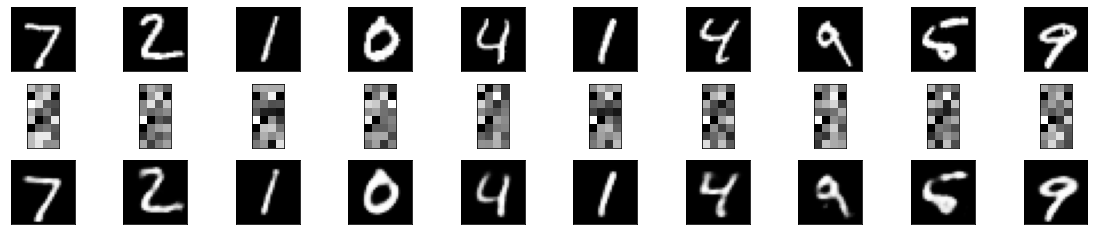

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
plt.show()

**Agora é a sua vez**

1) Verifique se o código no espaço interno de dimensão 32 é estável para dígitos de uma mesma classe e se ele muda para dígitos de classes diferentes (escreva um código para isso).

2) Utilizando os códigos anteriores, crie um autocoficador mais raso, com apenas 1 camada escondida (784-128-784) e treine este autocodificador pelo mesmo número de épocas de treinamento anterior (50). Agora, compare os valores da perda e da acurácia de validação (val_loss e val_acc), obtidos ao final do treinamento, com os respectivos valores resultantes do treinamento do modelo autocodificador original mais profundo. Alguma mudança perceptível nos valores? As imagens reconstruídas possuem a mesma qualidade? Procure explicar as eventuais diferenças. 

# **1) Verifique se o código no espaço interno de dimensão 32 é estável para dígitos de uma mesma classe e se ele muda para dígitos de classes diferentes (escreva um código para isso).**

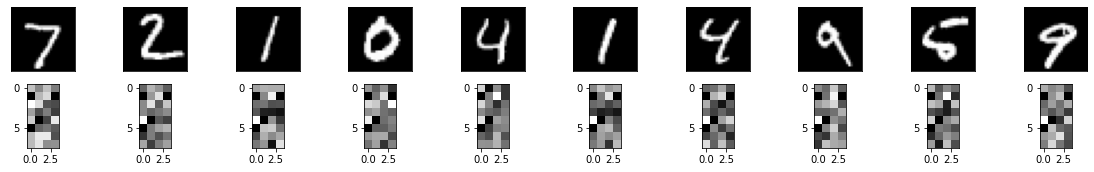

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()

Observa-se que os elementos [2] e [5] e [4] e [6] pertencem à mesma classe. Utilizando, então, um coeficiente de correlação para avaliar as matrizes codificadas, tem-se:

In [ ]:
import numpy as np
import pandas as pd

corr = []
enc_1 = [[],[]]
enc_2 = [[],[]]
elementos = ['Um','Quatro']
#np.corrcoef(encoded_imgs[2],encoded_imgs_2[5])
imgs_pair_1 = [2,4]
imgs_pair_2 = [5,6]
for pair in range(0,2):
  for pos in range(0,32):
    enc_1[pair].append(encoded_imgs_2[imgs_pair_1[pair]][pos])
    enc_2[pair].append(encoded_imgs_2[imgs_pair_2[pair]][pos])
  corr.append(np.corrcoef(enc_1[pair],enc_2[pair])[0][1])

data = {'Dígitos':elementos,'Correlação Dos Elementos Codificados':corr}
df = pd.DataFrame(data)
df
#np.corrcoef([1.2,1.23,1.67],[1.14,1.6,1.83])

,Dígitos,Correlação Dos Elementos Codificados
0,Um,0.806545
1,Quatro,0.302328


Como pode-se observar pelos resultados acima, para o caso dos dígitos 'Um' a correlação entre os elementos codificados é bem forte, enquanto que no caso dos dígitos 'quatro', esta é relativamente baixa. Isso se dá porque os dígitos 'Um' tem grafia bastante similar, resultando em uma codificação parecida. No caso dos dígitos 'Quatro', a grafia muda muito, resultando em uma correlação inferior dos elementos codificados.

# **2) Autocodificador raso**

In [ ]:
input_img= Input(shape=(784,))
encoded = Dense(units=128, activation='relu')(input_img)
decoded = Dense(units=784, activation='sigmoid')(encoded)

autoencoder=Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_2 = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.2154 - accuracy: 0.7949 - val_loss: 0.1366 - val_accuracy: 0.8085
Epoch 2/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.1187 - accuracy: 0.8114 - val_loss: 0.1032 - val_accuracy: 0.8125
Epoch 3/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0965 - accuracy: 0.8139 - val_loss: 0.0889 - val_accuracy: 0.8136
Epoch 4/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0859 - accuracy: 0.8148 - val_loss: 0.0815 - val_accuracy: 0.8140
Epoch 5/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0799 - accuracy: 0.8151 - val_loss: 0.0770 - val_accuracy: 0.8142
Epoch 6/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0762 - accuracy: 0.8152 - val_loss: 0.0741 - val_accuracy: 0.8143
Epoch 7/50
60000/60000 [==============================] - 4s 64us/st

In [ ]:
predicted_2 = autoencoder.predict(X_test)
encoded_imgs_2 = encoder.predict(X_test)

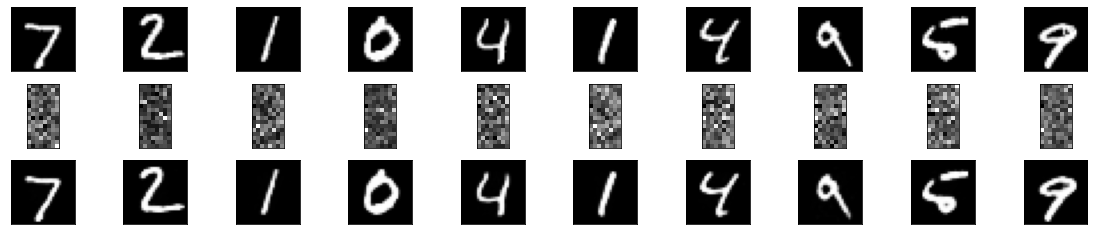

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs_2[i].reshape(16,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted_2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

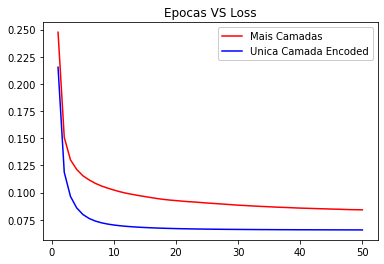

In [ ]:

loss_values_2 = history_2.history['loss']
acc_values_2 = history_2.history['accuracy']
acc_values_1 = history.history['accuracy']
loss_values_2

plt.title('Epocas VS Loss')
plt.plot(epochs, loss_values_1, 'r',label='Mais Camadas')
plt.plot(epochs, loss_values_2, 'b',label='Unica Camada Encoded')
plt.legend(framealpha=1, frameon=True);

plt.show()

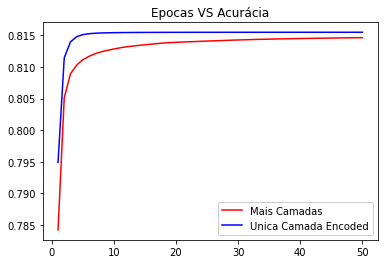

In [ ]:
plt.title('Epocas VS Acurácia')
plt.plot(epochs, acc_values_1, 'r',label='Mais Camadas')
plt.plot(epochs, acc_values_2, 'b',label='Unica Camada Encoded')
plt.legend(framealpha=1, frameon=True);

plt.show()



Como pode-se observar, as imagens reconstruídas na saída do autocodificador parecem ser mais nítidas. Além disso, há uma convergência mais rápida do modelo. Uma hipótese é que uma única camada codificada resulta em uma representação mais fácil de recuperar-se a dimensionalidade original, preservando as características da entrada. Isso pode ter sido possível devido à simplicidade dos elementos de treinamento, que tem poucas características. Um resultado insatisfatório seria obtido se fosse utilizado um dataset de imagens com características mais complexas. 